## Data pre-processing and data augmentation

To read the detail explanation about this you can use the following link: https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

Training a small convnet from the scratch. 

Making a dataset for convnet. 

In [4]:
import tensorflow as tf 
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization

In [3]:
# generator
train_gen = keras.utils.image_dataset_from_directory(directory='data/train', labels='inferred', label_mode='int', image_size=(150, 150), batch_size= 32)

test_gen = keras.utils.image_dataset_from_directory(directory='data/test', labels='inferred', label_mode='int', image_size=(150, 150), batch_size= 32)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [5]:
# Normalization of the dataset
def normalize_image(image, label):
    image = tf.cast(image/255., tf.float32)
    return image, label

train_gen = train_gen.map(normalize_image)
test_gen = test_gen.map(normalize_image)

Creating a CNN.

In [8]:
model1 = Sequential()

model1.add(Conv2D(32, kernel_size = (3, 3), padding='valid', activation='relu', input_shape=(150, 150, 3)))
model1.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model1.add(Conv2D(32, kernel_size = (3, 3), padding='valid', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model1.add(Conv2D(32, kernel_size = (3, 3), padding='valid', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model1.add(Flatten())

model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

In [9]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 32)       

In [10]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
history = model1.fit(train_gen, epochs=10, validation_data=test_gen)

Epoch 1/10
625/625 [==============================] - 111s 176ms/step - loss: 0.6192 - accuracy: 0.6465 - val_loss: 0.5388 - val_accuracy: 0.7298
Epoch 2/10
625/625 [==============================] - 119s 190ms/step - loss: 0.4824 - accuracy: 0.7670 - val_loss: 0.4776 - val_accuracy: 0.7826
Epoch 3/10
625/625 [==============================] - 119s 190ms/step - loss: 0.4069 - accuracy: 0.8138 - val_loss: 0.4224 - val_accuracy: 0.8116
Epoch 4/10
625/625 [==============================] - 121s 193ms/step - loss: 0.3448 - accuracy: 0.8478 - val_loss: 0.4153 - val_accuracy: 0.8134
Epoch 5/10
625/625 [==============================] - 128s 205ms/step - loss: 0.2768 - accuracy: 0.8846 - val_loss: 0.4418 - val_accuracy: 0.8148
Epoch 6/10
625/625 [==============================] - 115s 184ms/step - loss: 0.2067 - accuracy: 0.9125 - val_loss: 0.4861 - val_accuracy: 0.8184
Epoch 7/10
625/625 [==============================] - 117s 187ms/step - loss: 0.1414 - accuracy: 0.9437 - val_loss: 0.7111 -

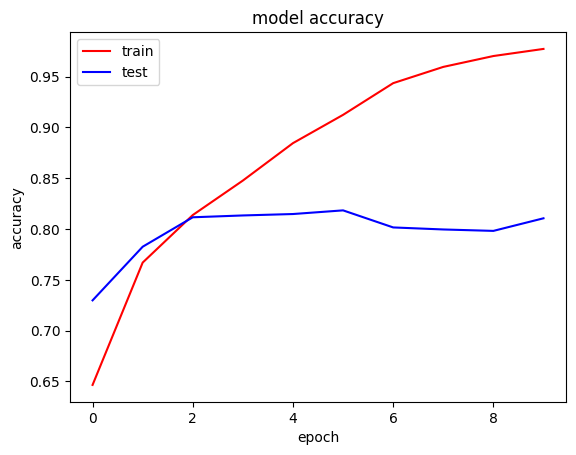

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train', color='r')
plt.plot(history.history['val_accuracy'], label='test', color='b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

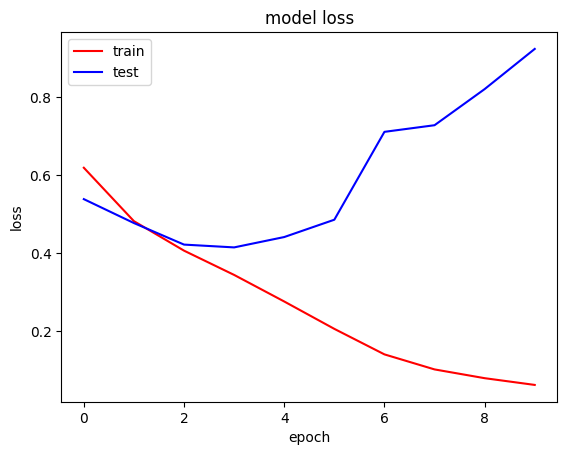

In [13]:
plt.plot(history.history['loss'], label='train', color='r')
plt.plot(history.history['val_loss'], label='test', color='b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

Here we can clearly see the Gap between the training and validation is keep increasing. This is the clear example of Overfitting. 
To deal with overfitting we can do: 
* More train Data. 
* Data augmentation --> Creating more data
* L1/L2 regularize
* Dropout
* Reduce Complexity
* Batch norm

Here I am using Dropout and batch norm technique to reduce the overfitting. 

In [14]:
model2 = Sequential()

model2.add(Conv2D(32, kernel_size = (3, 3), padding='valid', activation='relu', input_shape=(150, 150, 3)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model2.add(Conv2D(32, kernel_size = (3, 3), padding='valid', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model2.add(Conv2D(32, kernel_size = (3, 3), padding='valid', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model2.add(Flatten())

model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(1, activation='sigmoid'))

In [15]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 148, 148, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 72, 72, 32)        128       
 chNormalization)                                                
                                                      

In [16]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
history = model2.fit(train_gen, epochs=10, validation_data=test_gen)

Epoch 1/10
625/625 [==============================] - 149s 238ms/step - loss: 0.6153 - accuracy: 0.6827 - val_loss: 0.5070 - val_accuracy: 0.7542
Epoch 2/10
625/625 [==============================] - 167s 267ms/step - loss: 0.4635 - accuracy: 0.7800 - val_loss: 0.6497 - val_accuracy: 0.6738
Epoch 3/10
625/625 [==============================] - 158s 252ms/step - loss: 0.4008 - accuracy: 0.8166 - val_loss: 0.5259 - val_accuracy: 0.7766
Epoch 4/10
625/625 [==============================] - 156s 250ms/step - loss: 0.3234 - accuracy: 0.8576 - val_loss: 0.5979 - val_accuracy: 0.7628
Epoch 5/10
625/625 [==============================] - 155s 248ms/step - loss: 0.2502 - accuracy: 0.8953 - val_loss: 0.4296 - val_accuracy: 0.8236
Epoch 6/10
625/625 [==============================] - 176s 282ms/step - loss: 0.1644 - accuracy: 0.9334 - val_loss: 0.8371 - val_accuracy: 0.7906
Epoch 7/10
625/625 [==============================] - 173s 276ms/step - loss: 0.1271 - accuracy: 0.9505 - val_loss: 0.5938 -

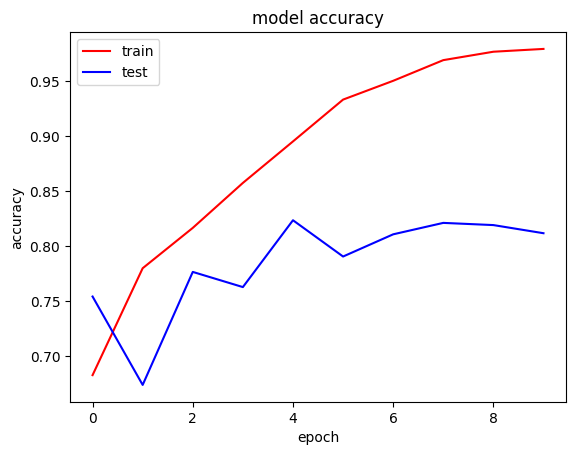

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train', color='r')
plt.plot(history.history['val_accuracy'], label='test', color='b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

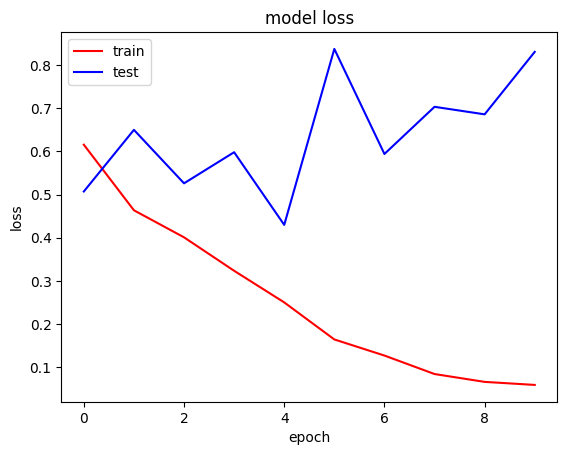

In [19]:
plt.plot(history.history['loss'], label='train', color='r')
plt.plot(history.history['val_loss'], label='test', color='b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()